In [33]:
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

In [290]:
df = pd.DataFrame()
df_err = pd.DataFrame()
df_sig = pd.DataFrame()
date = '11-22-2021'
outcomes = ['betweenness','domain','hashtag','entertainment','politics','sports','promotion'] 
for outcome in outcomes:
    filename = os.path.join(effects_dir,f'country_var_model_{outcome}_{date}.tsv')
    df_new = pd.read_csv(filename,sep='\t')
    df_new[outcome] = df_new['estimate']
    df['feature'] = df_new['term']    
    df[outcome] = df_new[outcome]
    df_err['feature'] = df_new['term']
    df_err[outcome] = df_new['std.error']
    df_sig['feature'] = df_new['term']
    df_sig[outcome] = df_new['p.value']


In [132]:
df = pd.melt(df,id_vars=['feature'])
df.columns = ['Variable','Outcome_ATT','Value']

In [133]:
df_err = pd.melt(df_err,id_vars=['feature'])
df_err.columns = ['Variable','Outcome_ATT','Std. Error']

In [134]:
df_sig = pd.melt(df_sig,id_vars=['feature'])
df_sig.columns = ['Variable','Outcome_ATT','P-value']

In [135]:
df = df.merge(df_err,on=['Variable','Outcome_ATT'])
df = df.merge(df_sig,on=['Variable','Outcome_ATT'])

In [93]:
sig = df.groupby(by='Variable').agg('mean').reset_index()
#sig = sig[sig['P-value']<0.05]
sig.sort_values(by='P-value',ascending=True)

,Variable,Value,Std. Error,P-value
0,(Intercept),2.215334,0.130131,6.826797e-21
3,gdpcap_ratio,1.147429,0.288140,1.960281e-02
2,gdp_ratio,-0.619975,0.306174,5.416343e-02
1,distance,0.365756,0.151781,6.026522e-02
13,time_difference_c2_c1,0.154222,0.126407,2.213381e-01
12,rta,0.209391,0.190327,2.328593e-01
11,pop_ratio,0.373581,0.276706,2.448404e-01
10,percent_migrants_dest_c2,-0.243432,0.178538,2.641634e-01
4,linguistic_distance,0.122183,0.133093,2.787897e-01
14,tradeflowcap,0.117037,0.197796,3.641098e-01


In [96]:
list(set(df['Variable']))

['percent_c1_migrants_from_c2',
 'percent_migrants_dest_c2',
 'rta',
 'percent_c2_migrants_from_c1',
 'tradeflowcap',
 'linguistic_distance',
 'gdpcap_ratio',
 'time_difference_c2_c1',
 'distance',
 'percent_conflicts_c2_to_c1',
 '(Intercept)',
 'gdp_ratio',
 'percent_migrants_dest_c1',
 'percent_conflicts_c1_to_c2',
 'pop_ratio']

In [111]:
set(df1['Variable'])

{'distance',
 'gdp_ratio',
 'gdpcap_ratio',
 'linguistic_distance',
 'percent_c2_migrants_from_c1',
 'percent_conflicts_c1_to_c2',
 'percent_migrants_dest_c2',
 'rta',
 'time_difference_c2_c1'}

In [160]:
features_of_interest = ['distance','time_difference_c2_c1',
                        'gdp_ratio','gdpcap_ratio','rta',
                       'percent_migrants_dest_c1',
                       'percent_migrants_dest_c2',
                       'percent_c2_migrants_from_c1',
                       'percent_c1_migrants_from_c2',
                       'linguistic_distance',
                       ]
color_index = [0,0,1,1,1,2,2,2,2,3]

In [163]:
[palette[c] for c in color_index]

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0)]

In [140]:
df_sub = df[df['Variable'].isin(features_of_interest)]

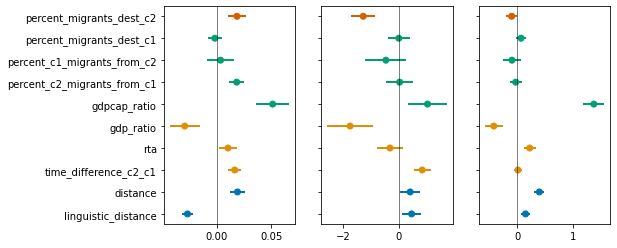

In [169]:
palette = sns.color_palette('colorblind')
f, axes = plt.subplots(1, 3, figsize=(8,4), sharey=True)
outcome_vars = ['betweenness','domain','hashtag']
for i in range(len(axes)):
    outcome = outcome_vars[i]
    ax=axes[i]
    ax.scatter(y='Variable',x='Value',
            data=df_sub[df_sub['Outcome_ATT']==outcome],
            c=[palette[c] for c in color_index]
                 )
    ax.axvline(0,color='black',lw=0.5)
    pos = range(len(features_of_interest))
    ax.errorbar(y=pos,x=df_sub[df_sub['Outcome_ATT']==outcome]['Value']
             ,xerr=df_sub[df_sub['Outcome_ATT']==outcome]['Std. Error'],
                ecolor=[palette[c] for c in color_index],ls='none',lw=2)


In [117]:
df

,Variable,Outcome_ATT,Value,Std. Error,P-value
2,linguistic_distance,betweenness,-0.026723,0.005276,7.139249e-07
3,distance,betweenness,0.019035,0.006668,4.604559e-03
8,rta,betweenness,0.010320,0.008222,2.103848e-01
9,gdp_ratio,betweenness,-0.029277,0.013618,3.236244e-02
10,gdpcap_ratio,betweenness,0.051158,0.015090,7.911917e-04
...,...,...,...,...,...
100,gdpcap_ratio,promotion,1.090149,0.209526,7.372169e-07
101,percent_c2_migrants_from_c1,promotion,-0.107887,0.124430,3.875007e-01
102,percent_c1_migrants_from_c2,promotion,-0.047832,0.145111,7.422109e-01
103,percent_migrants_dest_c1,promotion,0.000151,0.114055,9.989451e-01


In [9]:
plt.title

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

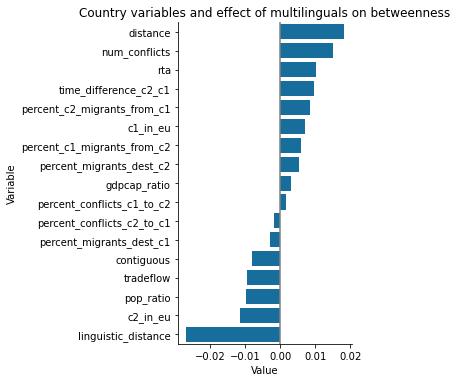

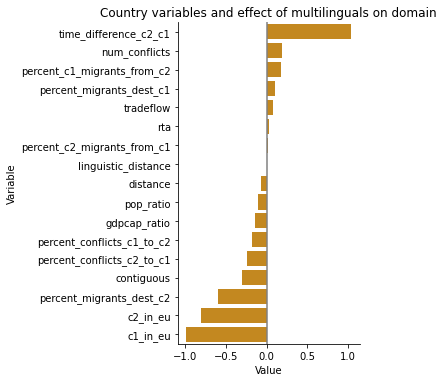

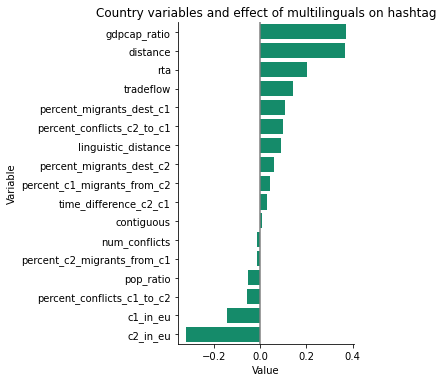

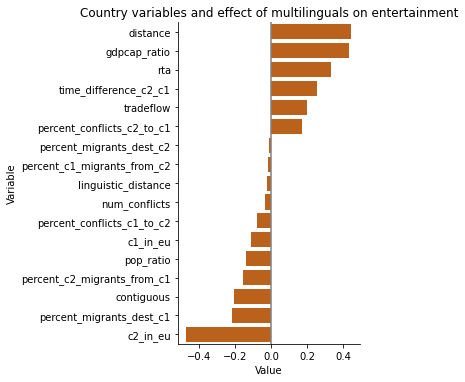

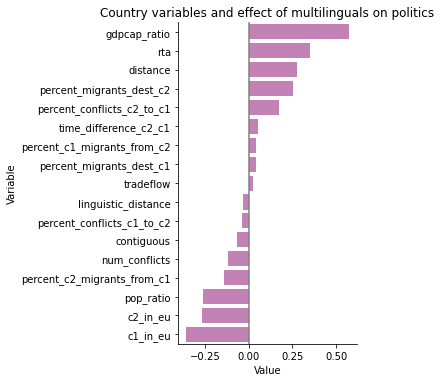

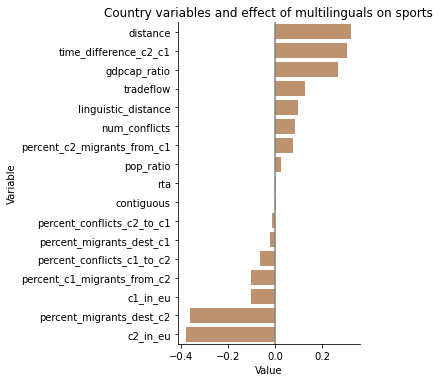

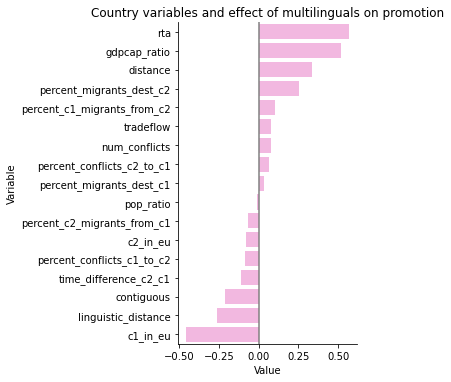

In [12]:
for i,outcome in enumerate(outcomes):
    sns.catplot(y='Variable',x='Value',
            data=df1[df1['Outcome_ATT']==outcome],
            order = df1[df1['Outcome_ATT']==outcome].sort_values(by='Value',ascending=False)['Variable'],
            color=palette[i],kind='bar')
    #plt.title(f'Relationship between effect of multilinguals and {outcome}')
    #plt.show()
    plt.axvline(0,color='gray')
    plt.title(f'Country variables and effect of multilinguals on {outcome}')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'gdpcap_ratio'),
  Text(1, 0, 'distance'),
  Text(2, 0, 'rta'),
  Text(3, 0, 'linguistic_distance'),
  Text(4, 0, 'time_difference_c2_c1'),
  Text(5, 0, 'percent_c2_migrants_from_c1'),
  Text(6, 0, 'percent_migrants_dest_c2'),
  Text(7, 0, 'percent_migrants_dest_c1'),
  Text(8, 0, 'percent_c1_migrants_from_c2'),
  Text(9, 0, 'gdp_ratio')])

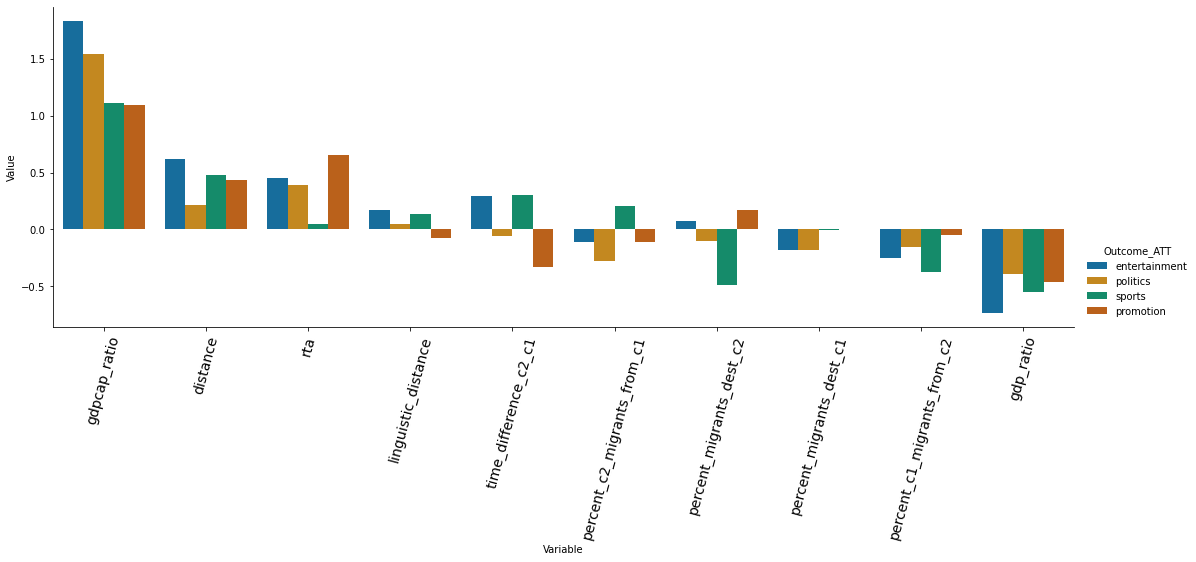

In [171]:
sns.catplot(y='Value',x='Variable',data=df_sub[df_sub['Outcome_ATT'].isin(outcomes[3:])],
            hue='Outcome_ATT',aspect=3,kind='bar',palette='colorblind',
           order = df_sub[df_sub['Outcome_ATT'].isin(outcomes[3:])].groupby('Variable').agg('mean').reset_index().sort_values('Value',ascending=False)['Variable'])
plt.xticks(rotation=75,fontsize=14)

In [80]:
plots_dir = os.path.join(effects_dir,'plots')

In [27]:
df

,Variable,Outcome_ATT,Value
0,(Intercept),betweenness,0.062316
1,pop_ratio,betweenness,-0.009783
2,linguistic_distance,betweenness,-0.027058
3,contiguous,betweenness,-0.008139
4,distance,betweenness,0.018355
...,...,...,...
121,gdpcap_ratio,promotion,0.515449
122,percent_c2_migrants_from_c1,promotion,-0.066352
123,percent_c1_migrants_from_c2,promotion,0.102600
124,percent_migrants_dest_c1,promotion,0.035211


In [66]:
df1 = df[['Country Pair','Country','betweenness','domain','hashtag','linguistic_closeness','distance']]

In [67]:
for outcome in ['betweenness','domain','hashtag']:
    df1[outcome] = (df[outcome])/(df[outcome].std())
    

<ipython-input-67-5fb8b569f9c6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[outcome] = (df[outcome])/(df[outcome].std())


In [68]:
df1 = pd.melt(df1,id_vars=['Country Pair','Country','distance','linguistic_closeness'])
df1.columns = ['Country Pair','Country','Distance','Linguistic Closeness','Outcome','ATT']

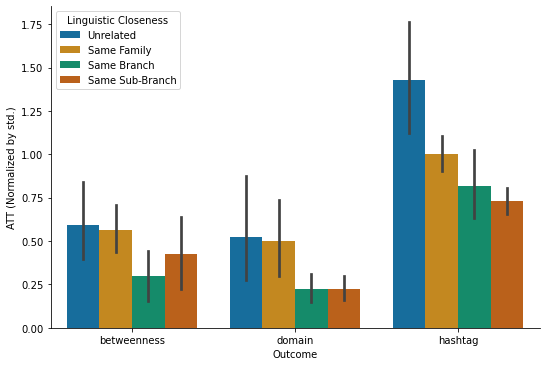

In [120]:
sns.catplot(y='ATT',x='Outcome',data=df1,kind='bar',hue='Linguistic Closeness',palette='colorblind',legend=False,
           aspect=1.5)
plt.ylabel('ATT (Normalized by std.)')
#plt.yticklabels(range(3),['Betweenness','Domain Sharing','Hashtag Sharing'])
plt.legend(title='Linguistic Closeness')
L=plt.legend(title='Linguistic Closeness')
L.get_texts()[0].set_text('Unrelated')
L.get_texts()[1].set_text('Same Family')
L.get_texts()[2].set_text('Same Branch')
L.get_texts()[3].set_text('Same Sub-Branch')
plt.savefig(os.path.join(plots_dir,'linguistic_closeness.pdf'),bbox_inches='tight')

In [87]:
import numpy as np

In [88]:

df1['Log Distance'] = np.log(df1['Distance'])

Text(16.424999999999997, 0.5, 'ATT (Normalized by std.)')

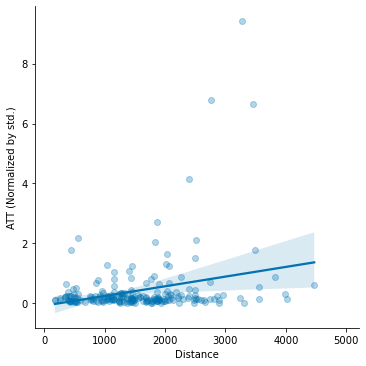

In [99]:
sns.lmplot(y='ATT',x='Distance',data=df1[df1['Outcome']=='domain'],hue='Outcome',palette='colorblind',legend=False,
          scatter_kws={'alpha':0.3})
plt.ylabel('ATT (Normalized by std.)')
#plt.yticklabels(range(3),['Betweenness','Domain Sharing','Hashtag Sharing'])
#plt.legend(title='Linguistic Closeness')

#plt.savefig(os.path.join(plots_dir,'linguistic_closeness.pdf'))

In [291]:
df

,feature,betweenness,domain,hashtag,entertainment,politics,sports,promotion
0,(Intercept),0.067597,4.064237,2.184411,2.813352,2.273093,2.228807,1.875844
1,pop_ratio,-0.011306,1.000975,0.331754,0.433086,-0.069499,0.664154,0.265900
2,linguistic_distance,-0.026723,0.458075,0.151832,0.169544,0.047164,0.133381,-0.077991
3,distance,0.019035,0.406919,0.399420,0.616213,0.211543,0.475262,0.431902
4,time_difference_c2_c1,0.016461,0.840483,0.016356,0.296851,-0.056980,0.301029,-0.334646
5,percent_conflicts_c1_to_c2,0.019328,-0.062685,-0.022288,0.044867,-0.205033,0.094344,-0.153694
6,percent_conflicts_c2_to_c1,0.002138,-0.282824,0.084642,0.166448,0.060648,0.076800,0.091863
7,tradeflowcap,-0.014572,0.340708,0.087969,0.281867,-0.135145,0.141143,0.117288
8,rta,0.010320,-0.316719,0.226803,0.451925,0.388273,0.048362,0.656771
9,gdp_ratio,-0.029277,-1.753388,-0.418104,-0.733986,-0.390038,-0.548275,-0.466760


In [292]:
df2 = df[['betweenness','domain','hashtag','entertainment','politics','sports','promotion']]

In [293]:
df2.corr()

,betweenness,domain,hashtag,entertainment,politics,sports,promotion
betweenness,1.000000,0.636964,0.784141,0.807671,0.796086,0.721752,0.768520
domain,0.636964,1.000000,0.883337,0.879158,0.801704,0.959217,0.767162
hashtag,0.784141,0.883337,1.000000,0.984978,0.978799,0.951801,0.948538
entertainment,0.807671,0.879158,0.984978,1.000000,0.970326,0.944097,0.945238
politics,0.796086,0.801704,0.978799,0.970326,1.000000,0.887699,0.948922
sports,0.721752,0.959217,0.951801,0.944097,0.887699,1.000000,0.854586
promotion,0.768520,0.767162,0.948538,0.945238,0.948922,0.854586,1.000000


In [172]:
outcomes

['betweenness',
 'domain',
 'hashtag',
 'entertainment',
 'politics',
 'sports',
 'promotion']

In [183]:
effects_dfs = []

In [184]:
for outcome in outcomes[:3]:
    effects_file = f'/shared/2/projects/cross-lingual-exchange/results/{outcome}_effects_with_country_vars_11-08-21.tsv'
    new_df = pd.read_csv(effects_file,sep='\t')
    new_df['Outcome'] = outcome
    new_df['ATT'] = new_df[outcome]
    effects_dfs.append(new_df)

In [185]:
effects_dfs[0]

,Unnamed: 0,Country Pair,Country,betweenness,domain,hashtag,entertainment,politics,sports,promotion,...,time_difference_c2_c1,log_dist,Estimate,Robust Std. Error,Robust P-value,Treated,Untreated,fifo_qty,Outcome,ATT
0,0,AM_GB,AM,0.190177,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.0,8.194054,0.190177,0.074991,0.011551,158,302,1,betweenness,0.190177
1,1,AM_GB,AM,0.190177,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.0,8.194054,0.190177,0.074991,0.011551,158,302,1,betweenness,0.190177
2,2,AM_GB,AM,0.190177,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.0,8.194054,0.190177,0.074991,0.011551,158,302,1,betweenness,0.190177
3,3,AM_GB,AM,0.190177,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.0,8.194054,0.190177,0.074991,0.011551,158,302,1,betweenness,0.190177
4,4,AM_GB,AM,0.190177,NaN,NaN,NaN,NaN,NaN,NaN,...,-4.0,8.194054,0.190177,0.074991,0.011551,158,302,1,betweenness,0.190177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787040,1787040,IE_RO,RO,0.251312,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,7.840372,0.251312,0.082531,0.002393,583,342,1,betweenness,0.251312
1787041,1787041,IE_RO,RO,0.251312,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,7.840372,0.251312,0.082531,0.002393,583,342,1,betweenness,0.251312
1787042,1787042,IE_RO,RO,0.251312,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,7.840372,0.251312,0.082531,0.002393,583,342,1,betweenness,0.251312
1787043,1787043,IE_RO,RO,0.251312,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.0,7.840372,0.251312,0.082531,0.002393,583,342,1,betweenness,0.251312


In [186]:
effects = pd.concat(effects_dfs)

In [187]:
effects = effects[['Country Pair','Country','linguistic_distance','distance','time_difference_c2_c1','Outcome','ATT']]

<AxesSubplot:xlabel='time_difference_c2_c1', ylabel='ATT'>

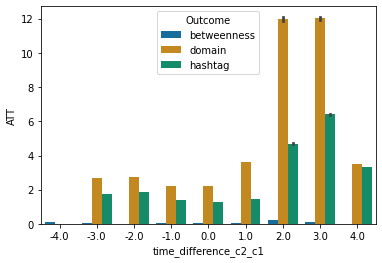

In [189]:
sns.barplot(x='time_difference_c2_c1',y='ATT',hue='Outcome',data=effects)

In [192]:
effects_small = effects.sample(frac=0.01)

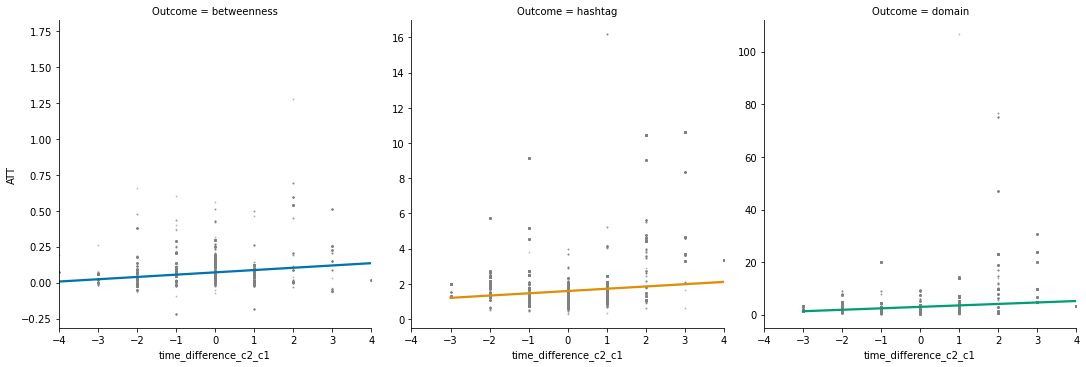

In [213]:
sns.lmplot(x='time_difference_c2_c1',y='ATT',col='Outcome',hue='Outcome',data=effects_small,sharey=False,
          scatter_kws={'s':1,'alpha':.4,'color':'grey'})

In [286]:
effects_small['time_diff'] = pd.to_numeric(effects_small['time_difference_c2_c1'], downcast='integer')
effects['time_diff'] = pd.to_numeric(effects['time_difference_c2_c1'], downcast='integer')

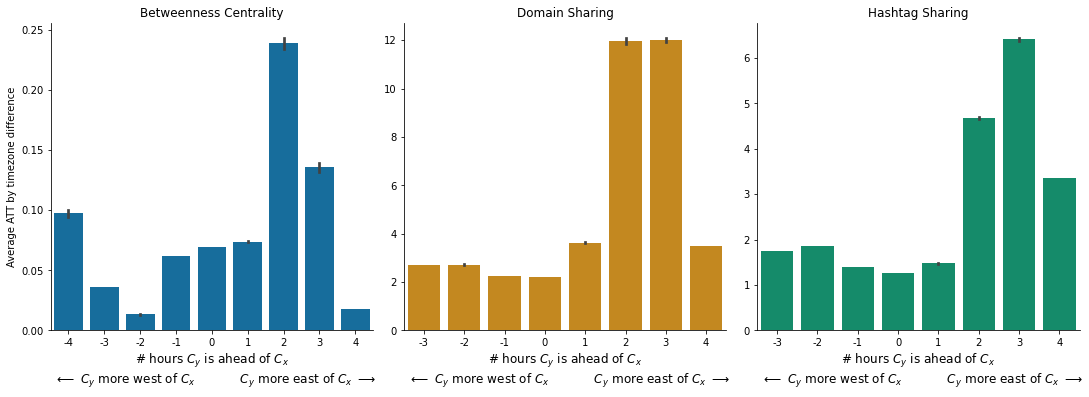

In [295]:
g = sns.catplot(x='time_diff',y='ATT',col='Outcome',hue='Outcome',data=effects,kind='bar',
            sharey=False,dodge=False,sharex=False)
(g.set_axis_labels("", "Average ATT by timezone difference")
 .set_xlabels("# hours $C_y$ is ahead of $C_x$ \n \
 $\longleftarrow$ $C_y$ more west of $C_x$            $C_y$ more east of $C_x$ $\longrightarrow$",
              fontsize=12)
)
axes = g.axes.flatten()
axes[0].set_title("Betweenness Centrality")
axes[1].set_title("Domain Sharing")
axes[2].set_title("Hashtag Sharing")
plt.savefig('/shared/2/projects/cross-lingual-exchange/results/time_diff_plot.pdf',bbox_inches='tight')

In [273]:
# Hours C2 is ahead of C1
# Arrows: -4: C1 further east, C2 further west 
# Arrows: 4: C1 further west, C2 further east 
